# **IPyNeuGraph**: _Python_ + _Jupyter_ Interface to **Circuit + Simulation Data**
<center>
    <img src="figures/FBL_ecosystem.png" width=800px>
</center>



In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from ipyneugraph import NeuGraph
import ipywidgets as widgets
import networkx as nx

In [3]:
ng = NeuGraph.from_gexf('../data/lon.gexf')
ng.load_IO('../data/lon_input.h5', IO='input')
ng.load_IO('../data/lon_output.h5', IO='output')

In [4]:
ng

NeuGraph(graph_data={'nodes': [('nc-LaN-1-R', {'phi': 0.001, 'initn': 0.3525, 'g_Ca': 4.0, 'offset': 0.0, 'V_L…

In [5]:
ng.fire_callback("resizeNodes",["outDegree"])

In [8]:
ng.fire_callback("colorNodes",["class", ["yellow", "red", "black"]])

In [17]:
ng.fire_callback("colorNodes",["class", ["red", "black"]])

In [10]:
ng.fire_callback("gridLayout",["degree", None, "descend"])

In [11]:
ng.fire_callback("gridLayout",["phi", None, "descend"])

In [12]:
ng.fire_callback("gridLayout",["phi", None, "ascend"])

In [13]:
ng.fire_callback("resizeNodes",["phi"])

In [14]:
ng.update_gexf('../data/mb_with_mod.gexf')

In [16]:
ng.fire_callback("gridLayout",["degree", None, "descend"])

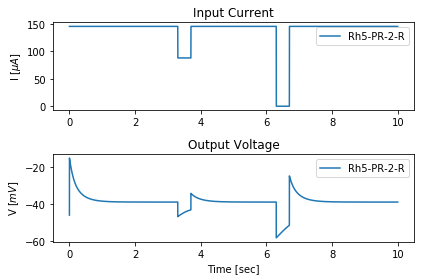

In [57]:
import matplotlib.pyplot as plt
import numpy as np
dt = ng.file_o['metadata'].attrs['dt']
Nt = ng.file_i['I/data'].shape[0]
t = np.arange(0, dt*Nt, dt)
uid = str(ng.file_i['I/uids'][0].astype(str))
idx_i =  list(ng.file_i['I/uids'][()].astype(str)).index(uid)
idx_o =  list(ng.file_o['V/uids'][()].astype(str)).index(uid)

plt.subplot(211)
plt.plot(t, ng.file_i['I/data'][:,idx_i], label=uid)
plt.title('Input Current')
plt.ylabel('I $[\mu A]$')
plt.legend()

plt.subplot(212)
plt.plot(t, ng.file_o['V/data'][:,idx_o], label=uid)
plt.title('Output Voltage')
plt.ylabel('V $[mV]$')
plt.xlabel('Time [sec]')
plt.legend()
plt.tight_layout()